In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/enron.csv')

In [3]:
df.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,NaN,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0,BADUM JAMES P
2,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,NaN,NaN,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,NaN,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0,BAY FRANKLIN R


In [4]:
# implementar o metodo de tukey

# lista de outliers (outliers para mais de n variaveis)
outliers = []
n = 2

for col in df.select_dtypes(include='number').columns.values:
  print(col)

  # calcular os quartis (Q3 e Q1)
  q1 = df[col].quantile(q=0.25)
  q3 = df[col].quantile(q=0.75)

  # calcular o tamanho da caixa (IQR = Q3 - Q1)
  iqr = q3 - q1

  # limites superiores e inferiores (whiskers/bigodes)
  sup = q3 + 1.5 * iqr 
  inf = q1 - 1.5 * iqr

  # obtendo os dados abaixo ou acima dos whiskers
  ix_outliers_col = list(df[(df[col] < inf) | (df[col] > sup)].index)

  print(ix_outliers_col)
  # armazenando os outliers dessa coluna na lista global de outliers
  for v in ix_outliers_col:
    outliers.append(v)    

bonus
[0, 7, 31, 42, 75, 78, 79, 91, 122, 130, 139]
deferral_payments
[0, 47, 66, 68, 130]
deferred_income
[0, 7, 47, 59, 112, 130]
director_fees
[8, 11, 94, 108, 130, 132]
exercised_stock_options
[3, 32, 35, 47, 65, 79, 103, 110, 112, 122, 130, 144]
expenses
[88, 116, 130, 132]
from_messages
[0, 6, 7, 19, 31, 32, 58, 62, 66, 72, 73, 75, 78, 89, 116, 117, 139]
from_poi_to_this_person
[7, 20, 26, 34, 37, 47, 58, 75, 78, 110, 139]
from_this_person_to_poi
[0, 6, 7, 19, 31, 58, 72, 73, 75, 78, 89, 116, 117]
loan_advances
[]
long_term_incentive
[40, 78, 79, 86, 130]
other
[3, 47, 69, 77, 79, 86, 103, 119, 121, 130, 140]
restricted_stock
[3, 11, 22, 47, 60, 69, 73, 79, 103, 112, 122, 130, 139, 140, 144]
restricted_stock_deferred
[11, 32, 130]
salary
[2, 32, 47, 57, 79, 105, 122, 130, 139]
shared_receipt_with_poi
[7, 117]
to_messages
[6, 7, 73, 75, 78, 117, 139]
total_payments
[3, 7, 11, 31, 47, 78, 79, 86, 122, 130, 139]
total_stock_value
[3, 32, 35, 41, 47, 65, 66, 79, 102, 103, 110, 112, 1

In [5]:
from collections import Counter
lista_indices = [x[0] for x in Counter(outliers).most_common(10)]
lista_indices

[130, 47, 7, 79, 78, 139, 122, 0, 75, 3]

In [6]:
Counter(outliers).most_common(100)

[(130, 13),
 (47, 9),
 (7, 8),
 (79, 8),
 (78, 7),
 (139, 7),
 (122, 6),
 (0, 5),
 (75, 5),
 (3, 5),
 (32, 5),
 (31, 4),
 (112, 4),
 (11, 4),
 (103, 4),
 (73, 4),
 (117, 4),
 (66, 3),
 (110, 3),
 (144, 3),
 (116, 3),
 (6, 3),
 (58, 3),
 (86, 3),
 (140, 3),
 (132, 2),
 (35, 2),
 (65, 2),
 (19, 2),
 (72, 2),
 (89, 2),
 (69, 2),
 (42, 1),
 (91, 1),
 (68, 1),
 (59, 1),
 (8, 1),
 (94, 1),
 (108, 1),
 (88, 1),
 (62, 1),
 (20, 1),
 (26, 1),
 (34, 1),
 (37, 1),
 (40, 1),
 (77, 1),
 (119, 1),
 (121, 1),
 (22, 1),
 (60, 1),
 (2, 1),
 (57, 1),
 (105, 1),
 (41, 1),
 (102, 1)]

In [7]:
df.loc[lista_indices]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
130,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0,TOTAL
47,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,2000000.0,1617011.0,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0,FREVERT MARK A
7,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,NaN,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0,BELDEN TIMOTHY N
79,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0,LAY KENNETH L
78,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,411.0,NaN,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0,LAVORATO JOHN J
139,3000000.0,NaN,NaN,NaN,greg.whalley@enron.com,3282960.0,57838.0,556.0,186.0,24.0,NaN,808346.0,301026.0,False,2796177.0,NaN,510364.0,3920.0,6019.0,4677574.0,6079137.0,WHALLEY LAWRENCE G
122,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0,SKILLING JEFFREY K
0,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,NaN,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
75,3100000.0,NaN,NaN,NaN,louise.kitchen@enron.com,81042.0,5774.0,1728.0,251.0,194.0,NaN,NaN,93925.0,False,466101.0,NaN,271442.0,3669.0,8305.0,3471141.0,547143.0,KITCHEN LOUISE
3,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C


#### Isolation Forest

In [8]:
from sklearn.ensemble import IsolationForest

In [9]:
# obtendo apenas colunas numericas
df_num = df.select_dtypes(include='number')

In [10]:
# imputando de valores faltantes (substituir valores faltantes por 0)
df_num.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
# criar a isolation forest
isof = IsolationForest(random_state=51)
isof.fit(df_num)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=51, verbose=0, warm_start=False)

In [12]:
# obtendo marcacoes de outliers
y_pred = isof.predict(df_num)

In [13]:
# adicionando coluna nova na tabela com a marcacao
df['inlier'] = y_pred

In [14]:
# filtrando apenas os outliers
df[df['inlier'] == -1]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name,inlier
7,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,NaN,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0,BELDEN TIMOTHY N,-1
11,NaN,NaN,NaN,137864.0,sanjay.bhatnagar@enron.com,2604490.0,NaN,29.0,0.0,1.0,NaN,NaN,137864.0,False,-2604490.0,15456290.0,NaN,463.0,523.0,15456290.0,NaN,BHATNAGAR SANJAY,-1
47,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,2000000.0,1617011.0,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0,FREVERT MARK A,-1
73,1000000.0,NaN,NaN,NaN,steven.kean@enron.com,2022048.0,41953.0,6759.0,140.0,387.0,NaN,300000.0,1231.0,False,4131594.0,NaN,404338.0,3639.0,12754.0,1747522.0,6153642.0,KEAN STEVEN J,-1
78,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,411.0,NaN,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0,LAVORATO JOHN J,-1
79,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0,LAY KENNETH L,-1
122,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0,SKILLING JEFFREY K,-1
130,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0,TOTAL,-1


In [15]:
# quao menor o score, mais outlier!
scores = isof.score_samples(df_num)
df['score'] = scores

In [16]:
df[df['inlier'] == -1]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name,inlier,score
7,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,NaN,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0,BELDEN TIMOTHY N,-1,-0.540658
11,NaN,NaN,NaN,137864.0,sanjay.bhatnagar@enron.com,2604490.0,NaN,29.0,0.0,1.0,NaN,NaN,137864.0,False,-2604490.0,15456290.0,NaN,463.0,523.0,15456290.0,NaN,BHATNAGAR SANJAY,-1,-0.557951
47,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,2000000.0,1617011.0,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0,FREVERT MARK A,-1,-0.632228
73,1000000.0,NaN,NaN,NaN,steven.kean@enron.com,2022048.0,41953.0,6759.0,140.0,387.0,NaN,300000.0,1231.0,False,4131594.0,NaN,404338.0,3639.0,12754.0,1747522.0,6153642.0,KEAN STEVEN J,-1,-0.515462
78,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,411.0,NaN,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0,LAVORATO JOHN J,-1,-0.571072
79,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0,LAY KENNETH L,-1,-0.719847
122,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0,SKILLING JEFFREY K,-1,-0.531281
130,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0,TOTAL,-1,-0.886864


In [17]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/california_housing_train.csv')

In [18]:
df.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


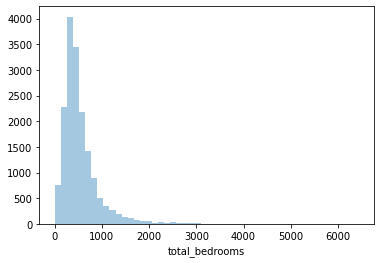

In [19]:
sns.distplot(df['total_bedrooms'], kde=False)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [21]:
# min max scaler
mm = MinMaxScaler()#feature_range=(-1,1))
df['total_bedrooms_mm'] = mm.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


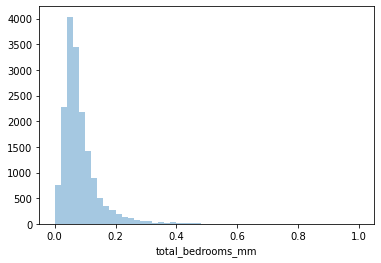

In [22]:
sns.distplot(df['total_bedrooms_mm'], kde=False)

In [23]:
# standard scaler
ss = StandardScaler()
df['total_bedrooms_ss'] = ss.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


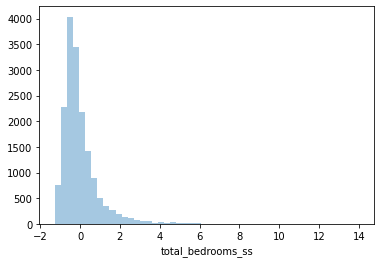

In [24]:
sns.distplot(df['total_bedrooms_ss'], kde=False)

In [25]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_mm,total_bedrooms_ss
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,1.700000e+04
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,0.083552,1.571553e-16
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,0.065410,1.000029e+00
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,-1.277408e+00
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,0.045934,-5.751323e-01
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,0.067194,-2.500927e-01
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,0.100442,2.582266e-01
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.401132e+01


In [26]:
# Robust scaler (outliers)
rs = RobustScaler()
df['total_bedrooms_rs'] = rs.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


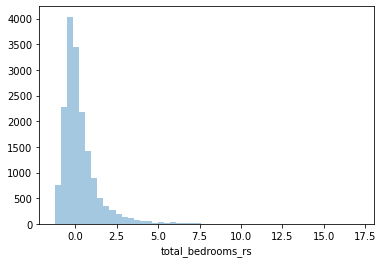

In [27]:
sns.distplot(df['total_bedrooms_rs'], kde=False)

In [28]:
# Box-cox
bc = PowerTransformer(method='box-cox')
df['total_bedrooms_bc'] = bc.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


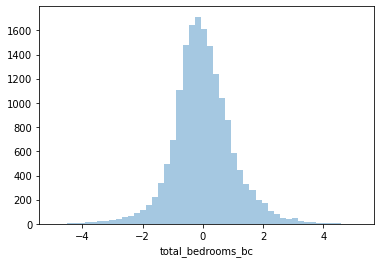

In [29]:
sns.distplot(df['total_bedrooms_bc'], kde=False)

In [30]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_mm,total_bedrooms_ss,total_bedrooms_rs,total_bedrooms_bc
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.198945,1.764204,2.417082,1.696275
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.294848,3.230441,4.176512,2.437964
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.026847,-0.866956,-0.740214,-1.241779
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.052142,-0.480230,-0.276157,-0.405203
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.050435,-0.506328,-0.307473,-0.450088


In [31]:
bc.inverse_transform(np.array(df['total_bedrooms_bc']).reshape(-1,1))

array([[1283.],
       [1901.],
       [ 174.],
       ...,
       [ 531.],
       [ 552.],
       [ 300.]])

In [32]:
### Como aplicar este tipo de transformação com dados de treinamento e teste?
# 1- Aplicar a transformação no treinamento ( e ao mesmo tempo, aprender parametros internos)
# 2- Aplucar a transformação no teste (reaproveitando os parametros)

In [33]:
df.drop(['total_bedrooms_mm','total_bedrooms_ss', 'total_bedrooms_rs','total_bedrooms_bc'], axis=1, inplace=True)

In [34]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [35]:
# dividindo em treino e teste
df_treino = df[:10000]
df_teste = df[10001:]

In [36]:
# minmaxscaler e depois box-cox

In [37]:
mm = MinMaxScaler(feature_range=(1,2))
bc = PowerTransformer(method='box-cox')

In [38]:
# ''aprendendo'' min-max scaler
mm.fit(df_treino)

MinMaxScaler(copy=True, feature_range=(1, 2))

In [39]:
# transformar a base com o min-max
df_treino_mm = mm.transform(df_treino)

In [40]:
df_treino_mm

array([[2.        , 1.2754591 , 1.26      , ..., 1.09061114, 1.06853009,
        1.10701193],
       [1.97069597, 1.31051753, 1.34      , ..., 1.08887604, 1.09104012,
        1.13422831],
       [1.95421245, 1.19198664, 1.3       , ..., 1.02217081, 1.07937822,
        1.14577466],
       ...,
       [1.        , 1.70116861, 1.98      , ..., 1.04819742, 1.19396974,
        1.11360984],
       [1.        , 1.70116861, 1.96      , ..., 1.05378832, 1.09426077,
        1.09855836],
       [1.        , 1.69949917, 1.86      , ..., 1.04395604, 1.08848154,
        1.07752752]])

In [41]:
# df_treino_mm

In [42]:
# aprender o box-cox
bc.fit(df_treino_mm)

PowerTransformer(copy=True, method='box-cox', standardize=True)

In [43]:
# aplicar o box-cox
df_treino_mm_bc = bc.transform(df_treino_mm)

In [44]:
###### Agora vamos aplicar o mesmo processo nos dados de TESTE
###### CUIDADO: vamos apenas usar o TRANSFORM (fit não pode ser usado!)

In [45]:
df_teste_mm = mm.transform(df_teste)

In [46]:
df_teste_mm_bc = bc.transform(df_teste_mm)

In [47]:
# Motivo de não dar fit novamente:
# o Fit ele "aprende" como a transformação deve ser feita
# então digamos que usamos fit nos dados treinamento e aprendemos uma transformação
# se aplicamos fit novamente nos dados de teste, é possível que a nova transformação 
# aprendida, desta vez, nos dados de teste, não tenha nada a ver com a anterior

In [48]:
# Exemplo do MinMax Scaler: 
# Treinamento: [0, 100] -> [0,1] -> 0 antes = 0 depois, 100 antes -> 1 depois
# Teste: apareceu um valor de 250: como fica isso transformado?
#        valor resultado: 2,5

In [49]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [50]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
100 * df.isna().sum() / len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [53]:
# começando pela cabine
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [54]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
# Caso fosse remover a coluna:
# df.drop('Cabin', axis=1, inplace=True)

In [56]:
# Substituir valores faltantes por um valor fixo na coluna Cabin
df['Cabin'] = df['Cabin'].replace(np.nan, 'UNK')
# df['Cabin'].fillna('UNK', inplace=True)

In [57]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNK,S


In [58]:
100 * df.isna().sum() / len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.000000
Embarked        0.224467
dtype: float64

In [59]:
# Pensando em Age (idade)
# Aprox. 20% de faltantes
df['Age'].mean()

29.69911764705882

In [60]:
df['Age'].median()

28.0

In [61]:
df['Age'].mode()

0    24.0
dtype: float64

In [62]:
# fillna
df['Age'].fillna(df['Age'].median(), inplace=True)

In [63]:
# Imputação de acordo com o sexo!
# Como que podemos fazer isso?

# apply? -> SIM
# loc -> Pesquisar como substituir valores usando o loc!

In [64]:
100 * df.isna().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.224467
dtype: float64

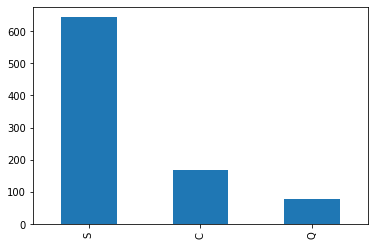

In [65]:
df['Embarked'].value_counts().plot(kind='bar')

In [66]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [67]:
# Moda
df['Embarked'].fillna('S', inplace=True)

In [68]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [69]:
!pip install missingpy

In [70]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [71]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [72]:
# apagando colunas de texto
df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [73]:
from missingpy import KNNImputer
# from missingpy import MissForest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [74]:
imputer = KNNImputer()
df_knn_imp = imputer.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [75]:
df_knn_imp

array([[  1.    ,   0.    ,   3.    , ...,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   1.    , ...,   1.    ,   0.    ,  71.2833],
       [  3.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   0.    ,   3.    , ...,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [891.    ,   0.    ,   3.    , ...,   0.    ,   0.    ,   7.75  ]])

In [76]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from itertools import chain, combinations

In [77]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/iris.csv')

In [78]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [79]:
# funcao que gera as combinacoes possiveis (conjunto potencia)
def powerset(valores):
  # powerset([1,2,3]) => (), (1), (2), (3), (1,2), (1,3), (2,3), (1,2,3)
  # d valores resulta em 2^d combinacoes
  s = list(valores)
  return chain.from_iterable(combinations(s,r) for r in range(1, len(s) + 1))

In [80]:
list(powerset([1,2,3]))

[(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

In [81]:
TARGET_COL = 'variety'
colunas = list(df.columns.values)
colunas.remove(TARGET_COL)

In [82]:
colunas

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [83]:
combinacoes = list(powerset(colunas))

In [84]:
combinacoes

[('sepal.length',),
 ('sepal.width',),
 ('petal.length',),
 ('petal.width',),
 ('sepal.length', 'sepal.width'),
 ('sepal.length', 'petal.length'),
 ('sepal.length', 'petal.width'),
 ('sepal.width', 'petal.length'),
 ('sepal.width', 'petal.width'),
 ('petal.length', 'petal.width'),
 ('sepal.length', 'sepal.width', 'petal.length'),
 ('sepal.length', 'sepal.width', 'petal.width'),
 ('sepal.length', 'petal.length', 'petal.width'),
 ('sepal.width', 'petal.length', 'petal.width'),
 ('sepal.length', 'sepal.width', 'petal.length', 'petal.width')]

In [85]:
# laco de repeticao para testar as diferentes combinacoes de atributos

for comb in combinacoes:

  # pega subconjunto de colunas para o modelo
  list_features = list(comb)

  # criar X e y
  X, y = df[list_features], df[TARGET_COL]


  # listas de resultados
  accs_knn = []
  accs_dt = []

  # leave one out
  loo = LeaveOneOut()

  # treinar e testar os modelos
  for train_index , test_index in loo.split(X):
    # obtendo dados de treino e teste
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # treinar o knn
    knn = KNeighborsClassifier(1, algorithm='brute')

    # treinar a arvore de decisao
    dt = DecisionTreeClassifier(criterion="entropy", 
                                min_samples_split=2, 
                                min_impurity_decrease=0.25)
    
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)


    # testar os modelos
    y_pred_knn = knn.predict(X_test)
    y_pred_dt = dt.predict(X_test)


    # medir se os modelos acertaram ou nao (acuracia)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    acc_dt = accuracy_score(y_test, y_pred_dt)

    # guardando os resultados na lista global
    accs_knn.append(acc_knn)
    accs_dt.append(acc_dt)

  # imprimir os resultados de acuracia media
  print('-' * 30)
  print(f'FEATURES USADAS: {comb}')
  print(f'\t KNN = {100.0 * sum(accs_knn) / len(accs_knn)}')
  print(f'\t DT = {100.0 * sum(accs_dt) / len(accs_dt)}')

------------------------------
FEATURES USADAS: ('sepal.length',)
	 KNN = 58.666666666666664
	 DT = 62.666666666666664
------------------------------
FEATURES USADAS: ('sepal.width',)
	 KNN = 48.0
	 DT = 52.666666666666664
------------------------------
FEATURES USADAS: ('petal.length',)
	 KNN = 88.0
	 DT = 94.0
------------------------------
FEATURES USADAS: ('petal.width',)
	 KNN = 88.0
	 DT = 95.33333333333333
------------------------------
FEATURES USADAS: ('sepal.length', 'sepal.width')
	 KNN = 70.0
	 DT = 62.666666666666664
------------------------------
FEATURES USADAS: ('sepal.length', 'petal.length')
	 KNN = 91.33333333333333
	 DT = 94.0
------------------------------
FEATURES USADAS: ('sepal.length', 'petal.width')
	 KNN = 92.66666666666667
	 DT = 95.33333333333333
------------------------------
FEATURES USADAS: ('sepal.width', 'petal.length')
	 KNN = 92.0
	 DT = 94.0
------------------------------
FEATURES USADAS: ('sepal.width', 'petal.width')
	 KNN = 92.66666666666667
	 DT

In [86]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [87]:
TARGET_COL = 'variety'
colunas = list(df.columns.values)
colunas.remove(TARGET_COL)

In [88]:
X, y = df[colunas], df[TARGET_COL]

In [89]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()

In [90]:
loo = LeaveOneOut()

In [91]:
rfe_dt = RFECV(estimator=dt, cv=loo, scoring='accuracy')
rfe_lr = RFECV(estimator=lr, cv=loo, scoring='accuracy')

rfe_dt.fit(X,y)
rfe_lr.fit(X,y)

RFECV(cv=LeaveOneOut(),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=1000,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [92]:
print('--- DT ---')
print(rfe_dt.n_features_) # qtas features foram selecionadas
print(rfe_dt.support_) # quais foram selecionadas
print(np.array(colunas)[rfe_dt.support_]) # verificando as colunas em si

--- DT ---
3
[ True False  True  True]
['sepal.length' 'petal.length' 'petal.width']


In [93]:
print('--- LR ---')
print(rfe_lr.n_features_) # qtas features foram selecionadas
print(rfe_lr.support_) # quais foram selecionadas
print(np.array(colunas)[rfe_lr.support_]) # verificando as colunas em si

--- LR ---
3
[False  True  True  True]
['sepal.width' 'petal.length' 'petal.width']


In [94]:
from sklearn.feature_selection import SelectKBest

In [95]:
X, y = df[colunas], df[TARGET_COL]

In [96]:
skb = SelectKBest(k=2)
X_selecionado = skb.fit_transform(X, y)

In [97]:
X_selecionado

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

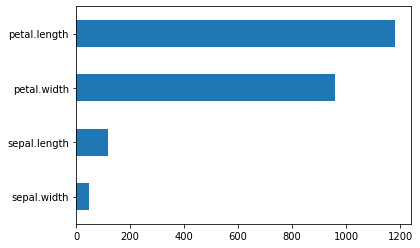

In [98]:
importancias = skb.scores_
importancias = pd.Series(data=importancias, index=X.columns.values)
importancias.sort_values().plot(kind='barh')


In [99]:
# [(2**x)-1 for x in range(1, 100)]

In [100]:
# Filtros tem um problema (grave!)
# Filtros analisam as colunas (features) de forma independente!
# Mas qual é a nossa garantia que o SW, quando combinado com outra coluna, não nos daria um resultado bom?
# Interação de alta ordem

In [101]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [102]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [103]:
dt.fit(X, y)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
importancias_dt = dt.feature_importances_
importancias_rf = rf.feature_importances_

In [105]:
importancias_dt = pd.Series(importancias_dt, index=X.columns.values)
importancias_rf = pd.Series(importancias_rf, index=X.columns.values)

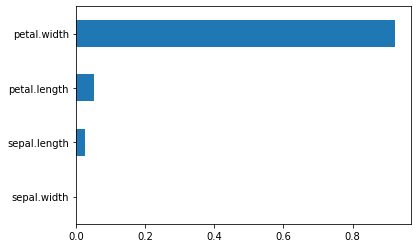

In [106]:
importancias_dt.sort_values().plot(kind='barh')

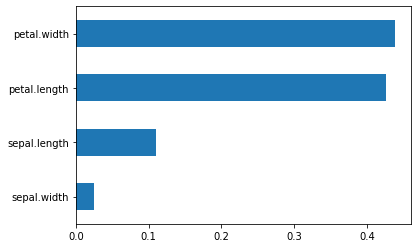

In [107]:
importancias_rf.sort_values().plot(kind='barh')

[Text(558.0, 498.3, 'petal.width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(472.15384615384613, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(643.8461538461538, 407.70000000000005, 'petal.width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(343.38461538461536, 317.1, 'petal.length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(171.69230769230768, 226.5, 'petal.width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(85.84615384615384, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(515.0769230769231, 226.5, 'petal.width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(429.23076923076917, 135.89999999999998

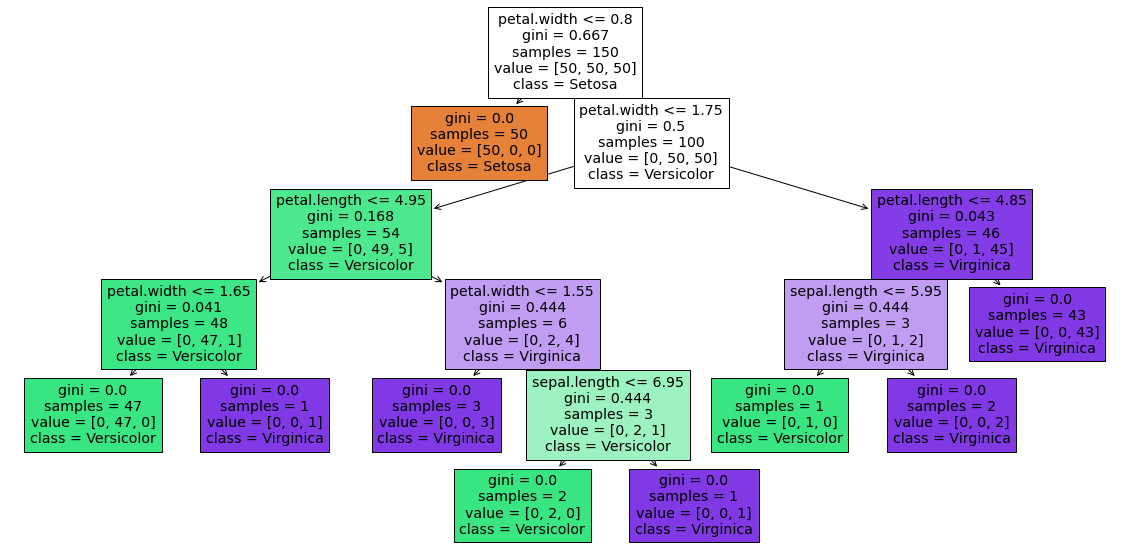

In [108]:
# plotando a arvore
fig = plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns.values,
               class_names=y.unique(), filled=True)

In [109]:
!pip install imblearn

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/imbalanced.csv')

In [112]:
df.head(3)

,attrib1,attrib2,attrib3,class
0,1.595781,5.540723,9.109505,groupA
1,2.657896,1.166703,1.368305,groupA
2,0.901466,4.374227,3.207844,groupA


In [113]:
# analisar o desbalanceamento
df['class'].value_counts() / len(df)

groupA    0.902
groupB    0.098
Name: class, dtype: float64

In [114]:
# dividir a base em treinamento e teste
from sklearn.model_selection import train_test_split
X, y = df.drop('class', axis=1), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [115]:
# Criar um modelo para verificar o comportamento antes de qualquer pre-processamento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [116]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# aplicando o modelo nos dados de teste
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9866666666666667

In [118]:
print(classification_report(y_test, y_pred))
# support: quantos exemplos/instancias temos de cada classe nos dados de teste
# precision: nos dá uma ideia de confiabilidade do modelo para aquela classe
#            de todos os casos que o modelo previu como sendo de uma classe, quantos de fato eram
# recall: nos dá uma ideia de "abrangencia" do modelo
#          de todos as instancias de uma classe, quantas o modelo conseguiu prever como sendo daquela classe

              precision    recall  f1-score   support

      groupA       0.99      1.00      0.99       280
      groupB       1.00      0.80      0.89        20

    accuracy                           0.99       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.99      0.99      0.99       300



In [119]:
confusion_matrix(y_test, y_pred)

array([[280,   0],
       [  4,  16]])

In [120]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [121]:
samplers = {'RO': RandomOverSampler(),
            'SMOTE': SMOTE(),
            'RU': RandomUnderSampler(),
            'NM1': NearMiss(version=1),
            'NM2': NearMiss(version=2),
            'NM3': NearMiss(version=3)}

In [122]:
for nome, sampler in samplers.items():
  # aplicar a tecnica APENAS NOS DADOS DE TREINO!
  X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)
  # verificar o percentual das classes
  print(nome)
  print(pd.Series(y_sampled).value_counts() / len(y_sampled))

  # treinar o modelo com os dados reamostrados
  lr.fit(X_sampled, y_sampled)
  y_pred = lr.predict(X_test) # DADOS DE TESTE INTACTOS!
  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))


RO
groupA    0.5
groupB    0.5
dtype: float64
0.9966666666666667
              precision    recall  f1-score   support

      groupA       1.00      1.00      1.00       280
      groupB       0.95      1.00      0.98        20

    accuracy                           1.00       300
   macro avg       0.98      1.00      0.99       300
weighted avg       1.00      1.00      1.00       300

SMOTE
groupA    0.5
groupB    0.5
dtype: float64
0.9933333333333333
              precision    recall  f1-score   support

      groupA       0.99      1.00      1.00       280
      groupB       1.00      0.90      0.95        20

    accuracy                           0.99       300
   macro avg       1.00      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300

RU
groupB    0.5
groupA    0.5
dtype: float64
0.9833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

      groupA       1.00      0.98      0.99       280
      groupB       0.80      1.00      0.89        20

    accuracy                           0.98       300
   macro avg       0.90      0.99      0.94       300
weighted avg       0.99      0.98      0.98       300

NM1
groupB    0.5
groupA    0.5
dtype: float64
0.99
              precision    recall  f1-score   support

      groupA       0.99      1.00      0.99       280
      groupB       1.00      0.85      0.92        20

    accuracy                           0.99       300
   macro avg       0.99      0.93      0.96       300
weighted avg       0.99      0.99      0.99       300

NM2
groupB    0.5
groupA    0.5
dtype: float64
0.9866666666666667
              precision    recall  f1-score   support

      groupA       0.99      1.00      0.99       280
      groupB       0.94      0.85      0.89        20

    accuracy                           0.99       300
   macro a

In [123]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/customers.csv')

In [124]:
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [125]:
df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [126]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [127]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f975eb7bf10>,
      dtype=object)

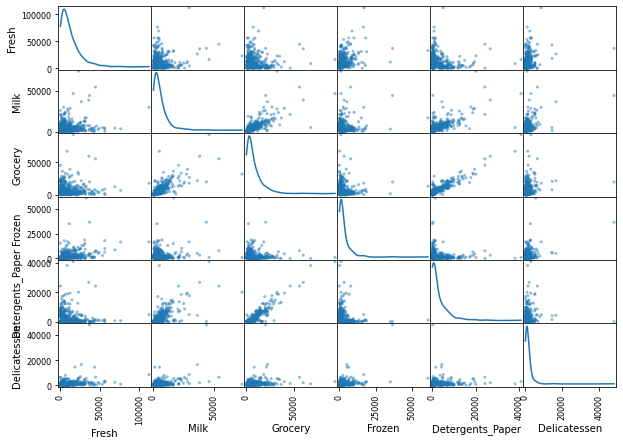

In [128]:
# antes de aplicar o PCA, vou analisar o comportamento das variaveis
# normais ou nao (?)
pd.plotting.scatter_matrix(df, figsize=(10,7), diagonal='kde')

In [129]:
# tentando resolver a assimetria dos dados
import numpy as np
df = np.log(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f975e1597d0>,
      dtype=object)

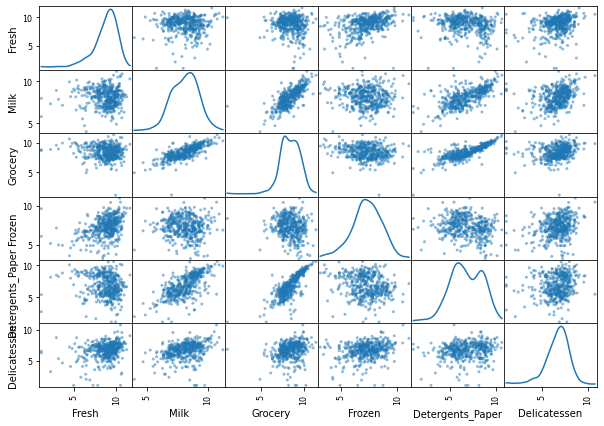

In [130]:
pd.plotting.scatter_matrix(df, figsize=(10,7), diagonal='kde')

In [131]:
# aplicando o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)

pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [132]:
# transformando os dados
dados_pca = pca.transform(df)

In [133]:
dados_pca

array([[-1.75098532, -0.07051523, -0.91175896, -1.72653578],
       [-1.80036534, -0.86975357,  0.2128306 ,  0.0079171 ],
       [-1.89373597, -1.67662072,  1.31888515, -0.48520333],
       ...,
       [-3.74793111, -0.92720658, -0.98904036, -0.92761413],
       [ 1.65797167, -0.47603534,  0.56709654, -1.28064478],
       [ 0.73789981,  3.63443815, -1.97053491, -1.12584791]])

In [134]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504


In [135]:
def pca_results(df, pca):
  '''
  Create a DataFrame of the PCA results
  Includes dimension feature weights and explained variance
  Visualizes the PCA results
  '''
  # Dimension indexing
  dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
  # PCA components
  components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
  components.index = dimensions
  # PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
  variance_ratios.index = dimensions
  # Create a bar plot visualization
  fig, ax = plt.subplots(figsize = (14,8))
  # Plot the feature weights as a function of the components
  components.plot(ax = ax, kind = 'bar');
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(dimensions, rotation=0)
  # Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
  # Return a concatenated DataFrame
  return pd.concat([variance_ratios, components], axis = 1)

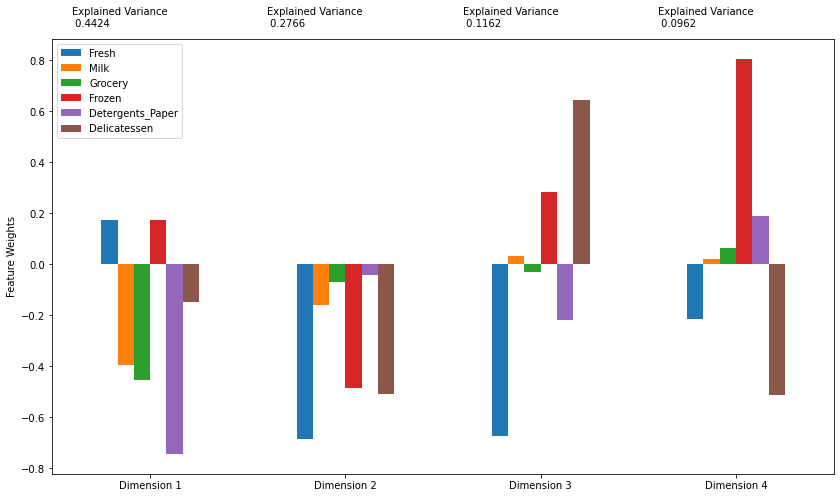

In [136]:
pca_explanation = pca_results(df, pca)

In [137]:
dados_pca


array([[-1.75098532, -0.07051523, -0.91175896, -1.72653578],
       [-1.80036534, -0.86975357,  0.2128306 ,  0.0079171 ],
       [-1.89373597, -1.67662072,  1.31888515, -0.48520333],
       ...,
       [-3.74793111, -0.92720658, -0.98904036, -0.92761413],
       [ 1.65797167, -0.47603534,  0.56709654, -1.28064478],
       [ 0.73789981,  3.63443815, -1.97053491, -1.12584791]])

In [138]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [139]:
pca_explanation['Explained Variance'].cumsum()

Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Name: Explained Variance, dtype: float64

In [140]:
# Digamos que temos um df_teste
# eu precisaria antes aplicar o PCA nos dados de teste e entao joga-los no modelo
# df_test_PCA = pca.transform(df_teste)
# clf.predict(df_test_PCA)

# NAO POSSO DAR FIT NOVAMENTE!

In [141]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [142]:
df_mnist = pd.DataFrame(mnist.data)
df_mnist['TARGET'] = mnist.target

In [143]:
df_mnist.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,TARGET
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


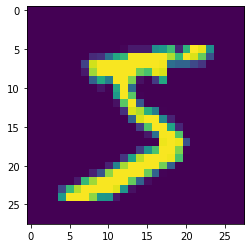

In [144]:
plt.imshow(np.array(df_mnist.drop('TARGET', axis=1).loc[0]).reshape(28,28))

In [145]:
# obtendo apenas uma parte da base de dados
# obtendo apenas 500 instancias
df_mnist = df_mnist.loc[:500]

In [146]:
df_mnist.shape

(501, 785)

In [147]:
X, y = df_mnist.drop('TARGET', axis=1), df_mnist['TARGET']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


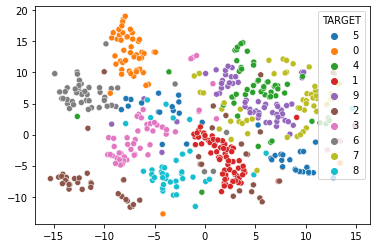

In [148]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=80, n_iter=2000)
X_transformado = tsne.fit_transform(X)

# visualizar o resultado
sns.scatterplot(X_transformado[:,0], X_transformado[:,1], hue=y)
plt.show()

In [149]:
# TSNE NÃO É PARAMÉTRICO, SIGNIFICA QUE NÃO PODEMOS APLICAR 
# ELE A CONJUNTOS DE TREINAMENTO E TESTE!

In [150]:
# paired t-test 
from scipy.stats import ttest_rel
# unpaired t-test
from scipy.stats import ttest_ind
# non-parametric
# wilcoxon test (paired)
from scipy.stats import wilcoxon
# mann-whitney u test (unpaired)
from scipy.stats import mannwhitneyu

In [151]:
# criar uma base de dados
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=50, 
                           n_informative=5, n_redundant=5, 
                           n_repeated=5, n_classes=3)

In [152]:
# definir classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

resultados = pd.DataFrame(columns=['lr', 'dt', 'knn'])

for train_index, test_index in skf.split(X, y):
  # separacao de dados
  X_train, y_train = X[train_index], y[train_index]
  X_test, y_test = X[test_index], y[test_index]

  # treino dos classificadores
  lr.fit(X_train, y_train)
  dt.fit(X_train, y_train)
  knn.fit(X_train, y_train)

  # predicoes e estimativa de acuracia
  acc_lr = accuracy_score(y_test, lr.predict(X_test))
  acc_dt = accuracy_score(y_test, dt.predict(X_test))
  acc_knn = accuracy_score(y_test, knn.predict(X_test))

  linha = {'lr': acc_lr, 'dt': acc_dt, 'knn': acc_knn}

  resultados = resultados.append(linha, ignore_index=True)

print(resultados)

      lr     dt    knn
0  0.701  0.808  0.794
1  0.703  0.783  0.748
2  0.686  0.814  0.760
3  0.692  0.805  0.780
4  0.688  0.819  0.761
5  0.691  0.819  0.771
6  0.695  0.808  0.787
7  0.685  0.803  0.765
8  0.687  0.794  0.787
9  0.704  0.834  0.781


In [154]:
# Teste:
# 1 - Esse problema é pareado ou não pareado?
# R. Como os classificadores foram treinados e testados 
#    exatamente com os mesmos dados, temos um problema PAREADO!

# 2 - Paramétrico ou não paramétrico?
# R. Não tenho certeza ou pelo menos não parece ser uma distribuição 
#    normal/gaussiana, então seguimos com testes não paramétricos!
# Dica: KS também serve para saber se os dados seguem uma distribuição gaussiana ou não!

In [155]:
# H0: Os classificadores se comportam de maneira igual!
# H1: Existe diferença significativa entre o comportamento dos classificadores
#     Diferença: um método ser melhor ou pior que o outro

In [156]:
# Nossa conclusão é que precisamos rodar o teste de Wilcoxon!
# LR versus DT (95%)
stat, p = wilcoxon(resultados['lr'], resultados['dt'])
if p > 0.05:
  print('n tem diferença!')
else:
  print('tenho diferença!')

tenho diferença!


In [157]:
# comparando dt versus knn
stat, p = wilcoxon(resultados['dt'], resultados['knn'])
print(1-p)
if p > 0.05:
  print('n tem diferença!')
else:
  print('tenho diferença!')

0.9949379678737321
tenho diferença!


### Friedman + Nemenyi

In [158]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(resultados['lr'], resultados['dt'], resultados['knn'])
if p > 0.05:
  print('n há diferença')
else:
  print('há diferença, preciso rodar o teste de nemenyi!')

há diferença, preciso rodar o teste de nemenyi!


In [159]:
# Já que temos diferença, precisamos encontrar entre quais métodos!
# para isso, aplicaremos o teste de nemenyi!

# calculo dos rankings
from scipy.stats import rankdata
ranking = (resultados * -1).apply(lambda row: rankdata([row['lr'], row['dt'], row['knn']]), axis=1)
ranking

0    [3.0, 1.0, 2.0]
1    [3.0, 1.0, 2.0]
2    [3.0, 1.0, 2.0]
3    [3.0, 1.0, 2.0]
4    [3.0, 1.0, 2.0]
5    [3.0, 1.0, 2.0]
6    [3.0, 1.0, 2.0]
7    [3.0, 1.0, 2.0]
8    [3.0, 1.0, 2.0]
9    [3.0, 1.0, 2.0]
dtype: object

In [160]:
!pip install orange3

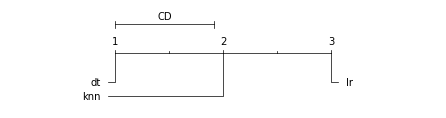

0.9178133315493953


In [161]:
import Orange
names = resultados.columns.values
avranks = ranking.mean() # calculando ranking medio de cada metodo (coluna)
cd = Orange.evaluation.compute_CD(avranks, len(ranking), alpha="0.1")
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()
print(cd)